# Homework 2 (due Mon, February 15)

**Step 1** Rename the file (Click on HW2 next to the jupyter logo) to include your name.

## Purpose: 
- To use create a plot and animate it using a slider.
- To write readable code by appropriate choices of variable and function names.

## Grading:
Your homework should be submitted by email.  
To receive credit for your homework submission, your jupyter notebook must meet the following requirements.  Those that do not will receive zero credit.
- The file name has been renamed with your name.
- Your entire submission runs correctly when run sequentially.  You can test this (and you are **strongly encouraged** to do so) by using the option: Kernel > "Restart and Run All".  Make sure that all the outputs are exactly as you expect.  This is what I will be doing.
- Your submission **is not** identical to someone else's homework submission.  It is acceptable (and maybe even encouraged) to work with others on your homework, but the final result must be your own work.  The best suggestion to avoid identical code?  Do not use copy-and-paste with others' solutions.
- Your variables and function names are descriptive (very loosely defined).  


Your homework should be turned in by email and should be completely self-contained.  This means that your homework should be written in a proper order such that when all programming cells are run sequentially, the desired results occur.  (Test this out before you submit:  Use the Kernel Menu, then choose "Restart and Run All".)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

**Exercise:**  Download and place in your working folder the file ``HW2.csv``, which has three columns: (0) is time (in seconds); (1) is position (in meters); (2) is velocity (in meters per second) for a projectile falling under the influence of gravity and air resistance.  

- Create a plot of velocity versus time
- Include axis labels for the x- and y-axes
- Choose a color for the curve on the plot
- Choose a marker for the data points by adding an additional statement: ``plt.plot(.., .., color='..', marker='..')``.  If you search for "matplotlib marker", you can find options
- Choose a line style for the graph with ``linestyle = '..'``

(Please note that all the ``..`` above should be replaced by appropriate arrays and/or options.)

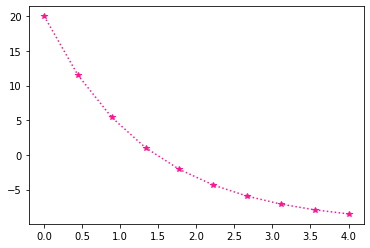

In [2]:
time, position, velocity = np.loadtxt('HW2.csv',delimiter=',',usecols=(0,1,2),unpack=True)

plt.figure()
plt.plot(time, velocity, color="deeppink", marker="*", linestyle=":")
plt.show()

<b>Exercise:</b>  Consider a wavepacket defined as:

$\displaystyle w(x, t; k_0, \sigma) = \int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi \sigma^2}} e^{ - (k - k_0)^2 / (2 \sigma^2) } \sin( k (x - t) ) \, dk = e^{- \sigma^2 (x - t)^2 / 2} \sin(k_0 (x - t))$

Here, we inherently describe waves that travel with speed $v = 1 = \omega / k$.

First, why do we call this a wavepacket?  Let's look at this wave at $t = 0$:

$\displaystyle w_0 (x; k_0, \sigma) = e^{- \sigma^2 x^2 / 2} \sin (k_0 x)$

This is the wavepacket as a function of $x$, for a given value of $k_0$ and $\sigma$.  What does $k_0$ and $\sigma$ mean?  
- Create a function **(1)** that will represent $w_0 (x; k_0, \sigma)$.
- We can explore this by creating a function **(2)** whose inputs are $k_0$ and $\sigma$, and this function will make a plot of $w_0 (x; k_0, \sigma)$ from x = -10 to 10 for the input values of $k_0$ and $\sigma$.  You must use the function **(1)** that you created in the previous bullet point.
- To make sure that it works, first use your function **(2)** to make a plot with $k_0 = 10$ and $\sigma = 0.5$.
- Create a slider that explores values of $k_0$ from 5 to 20 and $\sigma$ from 0.5 to 2.

In [3]:
def wavepacket(x,k,o):
    return np.exp(((-o**2)*(x**2)/2))*np.sin(k*x)

In [4]:
def wavepacketplot(k,o):
    wavenumber = np.linspace(-10,10,20000)
    wave = np.zeros(len(wavenumber))
    
    for i in range(len(wavenumber)):
        wave[i] = wavepacket(wavenumber[i],k,o)
    
    plt.figure()
    plt.plot(wavenumber,wave,color="deeppink")
    plt.xlabel("wave")
    plt.ylabel("wavepacket")
    plt.show()
    
widgets.interact(wavepacketplot,k=(5,20,1),o=(0.5,2,0.1))

interactive(children=(IntSlider(value=12, description='k', max=20, min=5), FloatSlider(value=1.200000000000000…

<function __main__.wavepacketplot(k, o)>

Finally, let's see the wavepacket move.
- Create a function **(3)** that will output the value of $w(x, t; k_0, \sigma)$.
- Create another function **(4)** whose inputs are $t$, $k_0$, and $\sigma$ that uses this function to plot $w(x, t; k_0, \sigma)$ from x = -10 to 10 at time $t$ with the input values of $k_0$ and $\sigma$.
- Create a slider that allows time to elapse from $t =$ 0 to 10 (in steps of 0.1) and the same range of $k_0$ and $\sigma$.

In [5]:
def output(x,t,k,o):
    return np.exp((-o**2)*((x-t)**2)/2)*np.sin(k*(x-t))

def output_plot(t,k,o):
    x = np.linspace(-10,10,100)
    wave_final = np.zeros(len(x))
    
    for i in range(len(x)):
        wave_final[i] = output(x[i],t,k,o)
    
    plt.figure()
    plt.plot(x,wave_final,color="deeppink")
    plt.xlabel("time")
    plt.ylabel("wave")
    plt.show
    
widgets.interact(output_plot,t=(0,10,0.1),k=(5,20,1),o=(0.5,2,0.1))

interactive(children=(FloatSlider(value=5.0, description='t', max=10.0), IntSlider(value=12, description='k', …

<function __main__.output_plot(t, k, o)>